In [1]:
import pandas as pd

df = pd.read_csv("../data/processed/clean_ecommerce.csv")
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [2]:
reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
reference_date


Timestamp('2011-12-10 12:50:00')

In [3]:
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
}).reset_index()


In [4]:
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]


In [5]:
rfm.head()
rfm.describe()


,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2054.266460
std,1721.808492,100.014169,7.697998,8989.230441
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,307.415000
50%,15299.500000,51.000000,2.000000,674.485000
75%,16778.750000,142.000000,5.000000,1661.740000
max,18287.000000,374.000000,209.000000,280206.020000


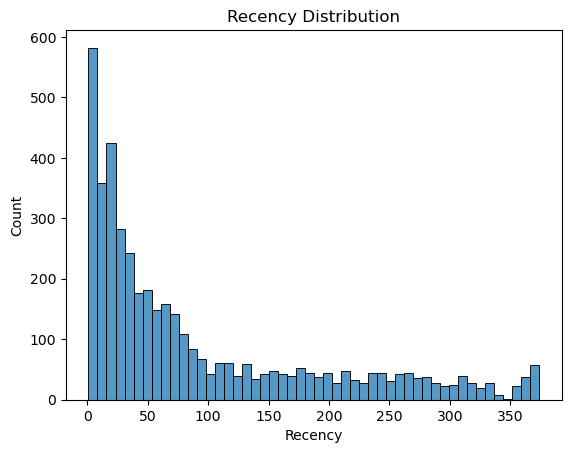

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(rfm["Recency"], bins=50)
plt.title("Recency Distribution")
plt.show()


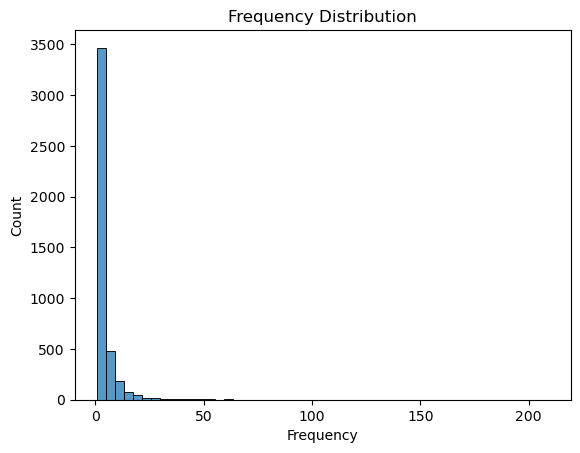

In [7]:
sns.histplot(rfm["Frequency"], bins=50)
plt.title("Frequency Distribution")
plt.show()


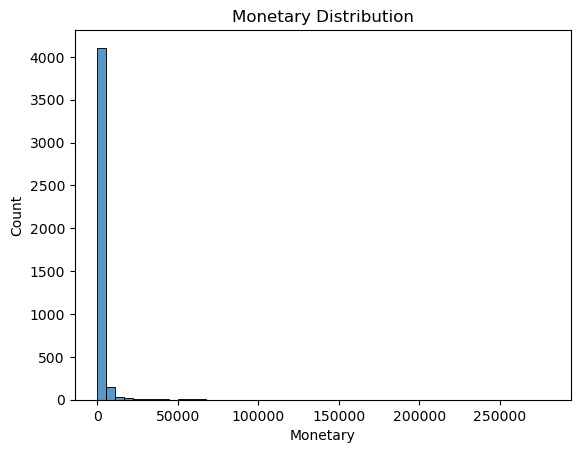

In [8]:
sns.histplot(rfm["Monetary"], bins=50)
plt.title("Monetary Distribution")
plt.show()
